In [17]:
import sympy
from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

from einsteinpy.symbolic.christoffel import ChristoffelSymbols

sympy.init_printing()

In [21]:
syms = sympy.symbols("t r theta phi")
t, r, th, ph = syms
m = sympy.diag(-1, 1, r ** 2 + 1,  (r ** 2 + 1)*sin(th)**2 ).tolist()
metric = MetricTensor(m, syms)

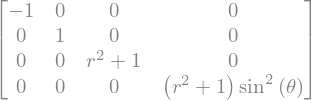

In [22]:
metric.tensor()

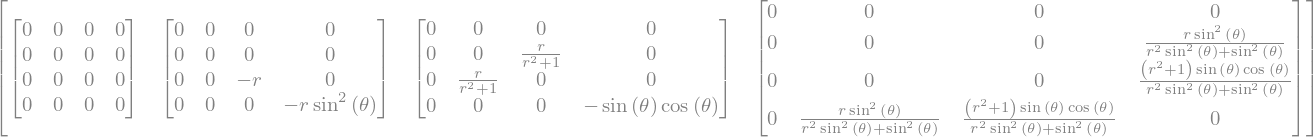

In [23]:
ChristoffelSymbols.from_metric(metric).tensor()

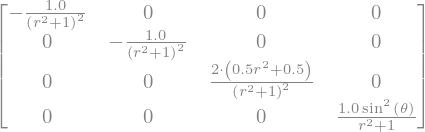

In [25]:
EinsteinTensor.from_metric(metric).tensor()